In [3]:

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from numpy import asarray


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('Weekly sales for a novelty item p3738 Montgomery.csv', index_col=0)
df['x'].fillna(df['x'].mean(), inplace=True)
df

,x
1,35
2,46
3,51
4,46
5,48
...,...
61,79
62,79
63,77
64,84


In [4]:
n_vars = 1 if type(df) is list else df.shape[1]
cols = list()
for i in range(1, 0, -1):
    cols.append(df.shift(i))
for i in range(0, 1):
    cols.append(df.shift(-i))
# put it all together
agg = pd.concat(cols, axis=1)
agg.dropna(inplace=True)
list_for_forecast = agg.values

In [5]:

len(list_for_forecast)

64

In [6]:

def decision_tree_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = DecisionTreeRegressor(random_state=0)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]


In [7]:

def random_forest_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]


In [8]:
predictions = list()
size = int(len(list_for_forecast) * 0.66)
train, test = list_for_forecast[0:size], list_for_forecast[size:len(list_for_forecast)]
history = [x for x in train]

for i in range(len(test)):
    testX, testy = test[i, :-1], test[i, -1]
    yhat = random_forest_forecast(history, testX)
    predictions.append(yhat)
    history.append(test[i])

error = mean_absolute_error(test[:, -1], predictions)
print("Random Forest error: ", error)

Random Forest error:  10.006828414010231


In [9]:
print("Random Forest metrics: ")
print("RMSE:", np.sqrt(mean_squared_error(test[:, -1], predictions)))
print("MAPE:", mean_absolute_percentage_error(test[:, -1], predictions))
print("MAE:", mean_absolute_error(test[:, -1], predictions))
print("R2: ", r2_score(test[:, -1], predictions))

Random Forest metrics: 
RMSE: 12.241979241759026
MAPE: 0.1287237852703231
MAE: 10.006828414010231
R2:  -1.4042948386005145


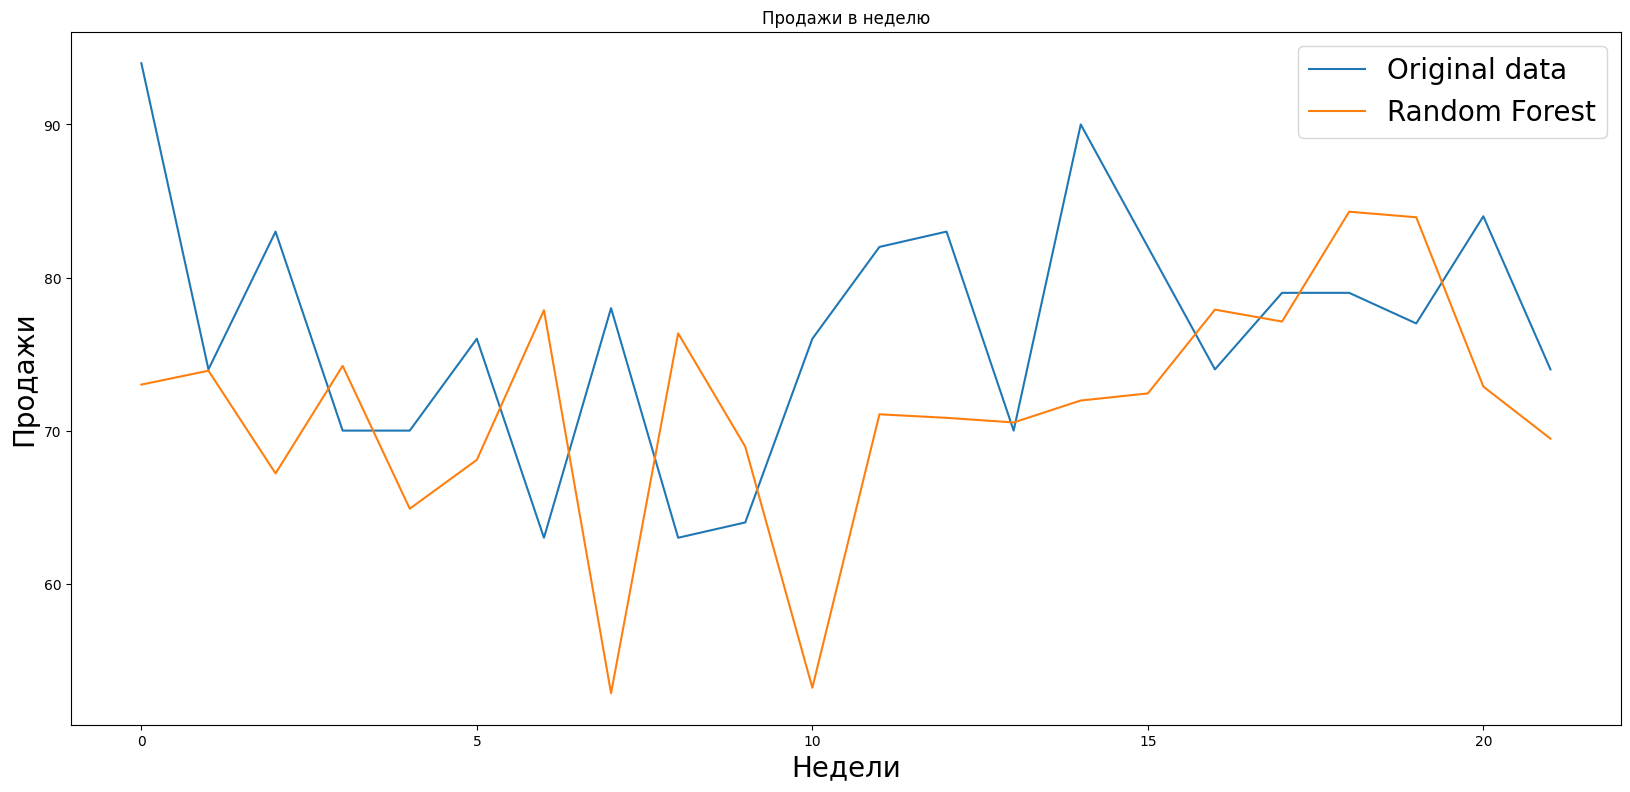

In [10]:

fig = plt.figure(figsize=(20, 9))
plt.plot(test[:, -1], label='Original data')
plt.plot(predictions, label='Random Forest')
plt.legend(fontsize="20")
plt.title('Продажи в неделю')
plt.ylabel('Продажи', fontsize="20")
plt.xlabel('Недели', fontsize="20")
plt.show()


In [11]:

predictions = list()
size = int(len(list_for_forecast) * 0.66)
train, test = list_for_forecast[0:size], list_for_forecast[size:len(list_for_forecast)]
history = [x for x in train]

for i in range(len(test)):
    testX, testy = test[i, :-1], test[i, -1]
    yhat = decision_tree_forecast(history, testX)
    predictions.append(yhat)
    history.append(test[i])


In [12]:
print("Decision Forest metrics: ")
print("RMSE:", np.sqrt(mean_squared_error(test[:, -1], predictions)))
print("MAPE:", mean_absolute_percentage_error(test[:, -1], predictions))
print("MAE:", mean_absolute_error(test[:, -1], predictions))
print("R2: ", r2_score(test[:, -1], predictions))

Decision Forest metrics: 
RMSE: 13.35552131123864
MAPE: 0.1497391972095163
MAE: 11.583333333333332
R2:  -1.8615816087890074


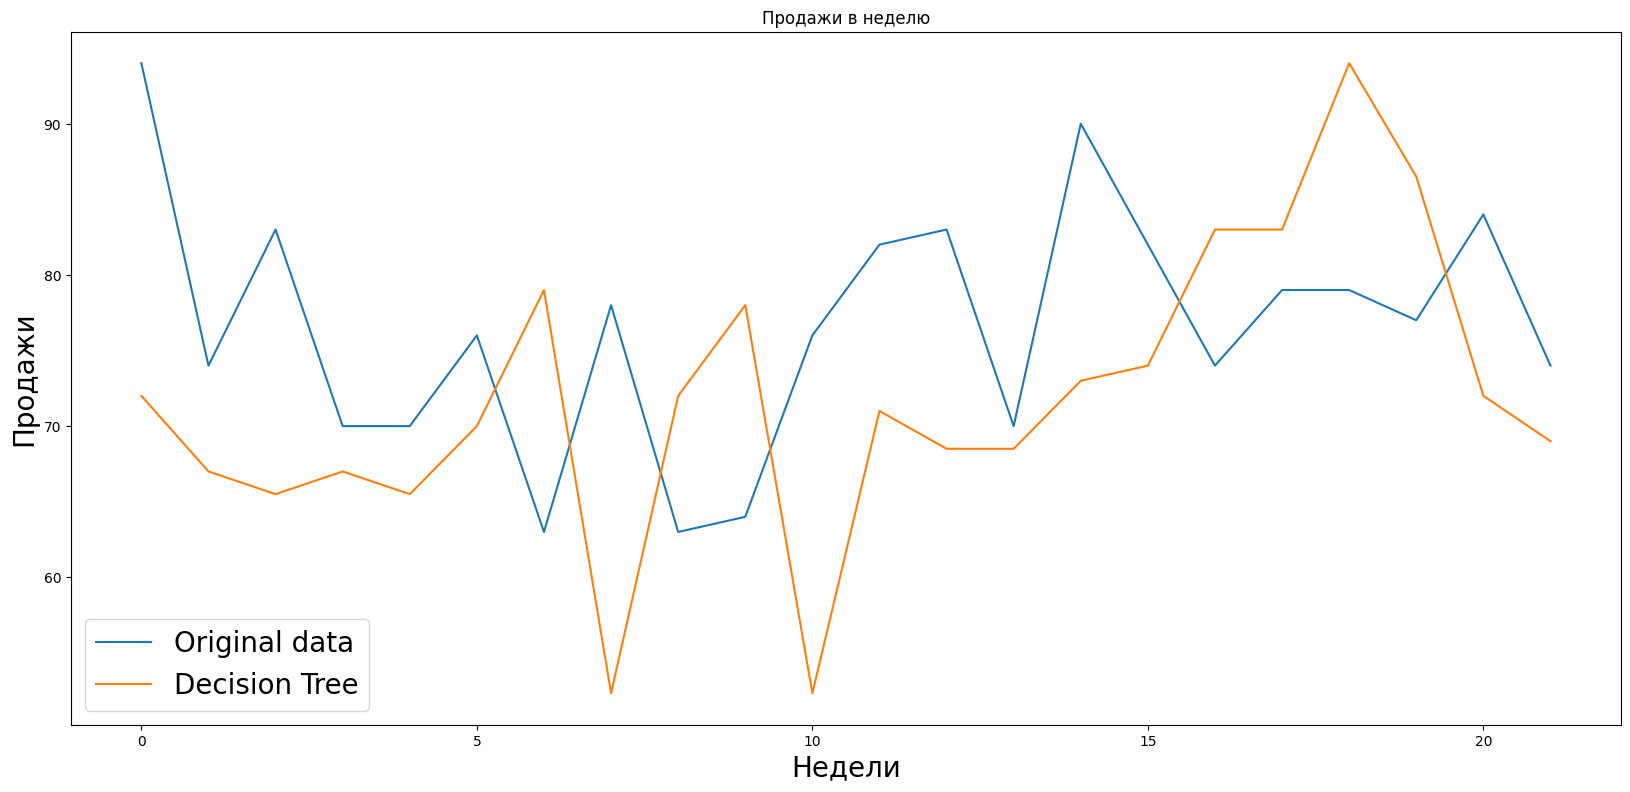

In [13]:
fig = plt.figure(figsize=(20, 9))
plt.plot(test[:, -1], label='Original data')
plt.plot(predictions, label='Decision Tree')
plt.legend(fontsize="20")
plt.title('Продажи в неделю')
plt.ylabel('Продажи', fontsize="20")
plt.xlabel('Недели', fontsize="20")
plt.show()

In [14]:

from sklearn.ensemble import IsolationForest


df = pd.read_csv('Weekly sales for a novelty item p3738 Montgomery.csv')
df['x'].fillna(df['x'].mean(), inplace=True)
df.set_index('x').sort_index()

,Unnamed: 0
x,
35,1
41,9
42,14
42,8
43,19
...,...
83,39
83,56
84,64


In [18]:
model = IsolationForest(contamination=0.004)
model.fit(df[['x']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.004)

In [19]:

df['outliers'] = pd.Series(model.predict(df[['x']])).apply(lambda x: 'yes' if (x == -1) else 'no' )

In [20]:

df.query('outliers=="yes"')

,Unnamed: 0,x,outliers
43,44,94,yes


In [21]:

fig = px.scatter(df.reset_index(), y='x', color='outliers')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()
